<a href="https://colab.research.google.com/github/fanatic8/Machine_Learning/blob/main/Taxi_trip_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn

In [12]:
#imports necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [14]:
url = 'https://raw.githubusercontent.com/fanatic8/Machine_Learning/refs/heads/main/taxi_trip_pricing.csv'
df1 = pd.read_csv(url)



## Data Preprocessing and cleaning

In [15]:
df1.shape

(1000, 11)

In [16]:
df1.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [17]:
df1.head() #gives the first 5 rows of dataframe.

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [18]:
df1.isnull().sum() #provides if there is any null values in the dataframe

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [19]:
df2 = df1.dropna()
df2.isnull().sum()
df2.count()

,0
Trip_Distance_km,562
Time_of_Day,562
Day_of_Week,562
Passenger_Count,562
Traffic_Conditions,562
Weather,562
Base_Fare,562
Per_Km_Rate,562
Per_Minute_Rate,562
Trip_Duration_Minutes,562


In [20]:
df1['Trip_Distance_km'] = df1['Trip_Distance_km'].fillna(df1['Trip_Distance_km'].mean())
df1['Passenger_Count']= df1['Passenger_Count'].fillna(round(df1['Passenger_Count'].mean()))
df1['Base_Fare'] = df1['Base_Fare'].fillna(df1['Base_Fare'].mean())
df1['Per_Km_Rate'] = df1['Per_Km_Rate'].fillna(df1['Per_Km_Rate'].mean())
df1['Per_Minute_Rate'] = df1['Per_Minute_Rate'].fillna(df1['Per_Minute_Rate'].mean())
df1['Trip_Duration_Minutes'] = df1['Trip_Duration_Minutes'].fillna(df1['Trip_Duration_Minutes'].mean())
df1['Trip_Price'] = df1['Trip_Price'].fillna(df1['Trip_Price'].mean())

In [21]:
df1.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.320000,53.820000,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.430000,40.570000,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.150000,37.270000,52.903200
3,30.330000,Evening,Weekday,4.0,Low,NaN,3.480000,0.51,0.150000,116.810000,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.320000,22.640000,15.618000
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.480000,89.330000,60.202800
6,3.850000,Afternoon,Weekday,4.0,High,Rain,3.510000,1.66,0.292916,5.050000,11.264500
7,43.440000,Evening,Weekend,3.0,NaN,Clear,2.970000,1.87,0.230000,62.118116,101.121600
8,30.450000,Morning,Weekday,3.0,High,Clear,2.770000,1.78,0.340000,110.330000,56.874773
9,35.700000,Afternoon,Weekday,2.0,Low,Rain,3.390000,1.52,0.470000,62.118116,75.565700


In [22]:
duplicate_data = df1[df1.duplicated()]
print(duplicate_data.any())

Trip_Distance_km         False
Time_of_Day              False
Day_of_Week              False
Passenger_Count          False
Traffic_Conditions       False
Weather                  False
Base_Fare                False
Per_Km_Rate              False
Per_Minute_Rate          False
Trip_Duration_Minutes    False
Trip_Price               False
dtype: bool


In [23]:
df1.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,50
Day_of_Week,50
Passenger_Count,0
Traffic_Conditions,50
Weather,50
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [24]:
df1.dropna(inplace=True)

In [25]:
df1.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [26]:
df1.count()

,0
Trip_Distance_km,811
Time_of_Day,811
Day_of_Week,811
Passenger_Count,811
Traffic_Conditions,811
Weather,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


## **Exploratory data analysis**

In [27]:
 sk =df1['Trip_Price'].skew()
print(sk)

3.9184181987826125


In [28]:
df1['Trip_Distance_km'].skew()

2.3631579670484952

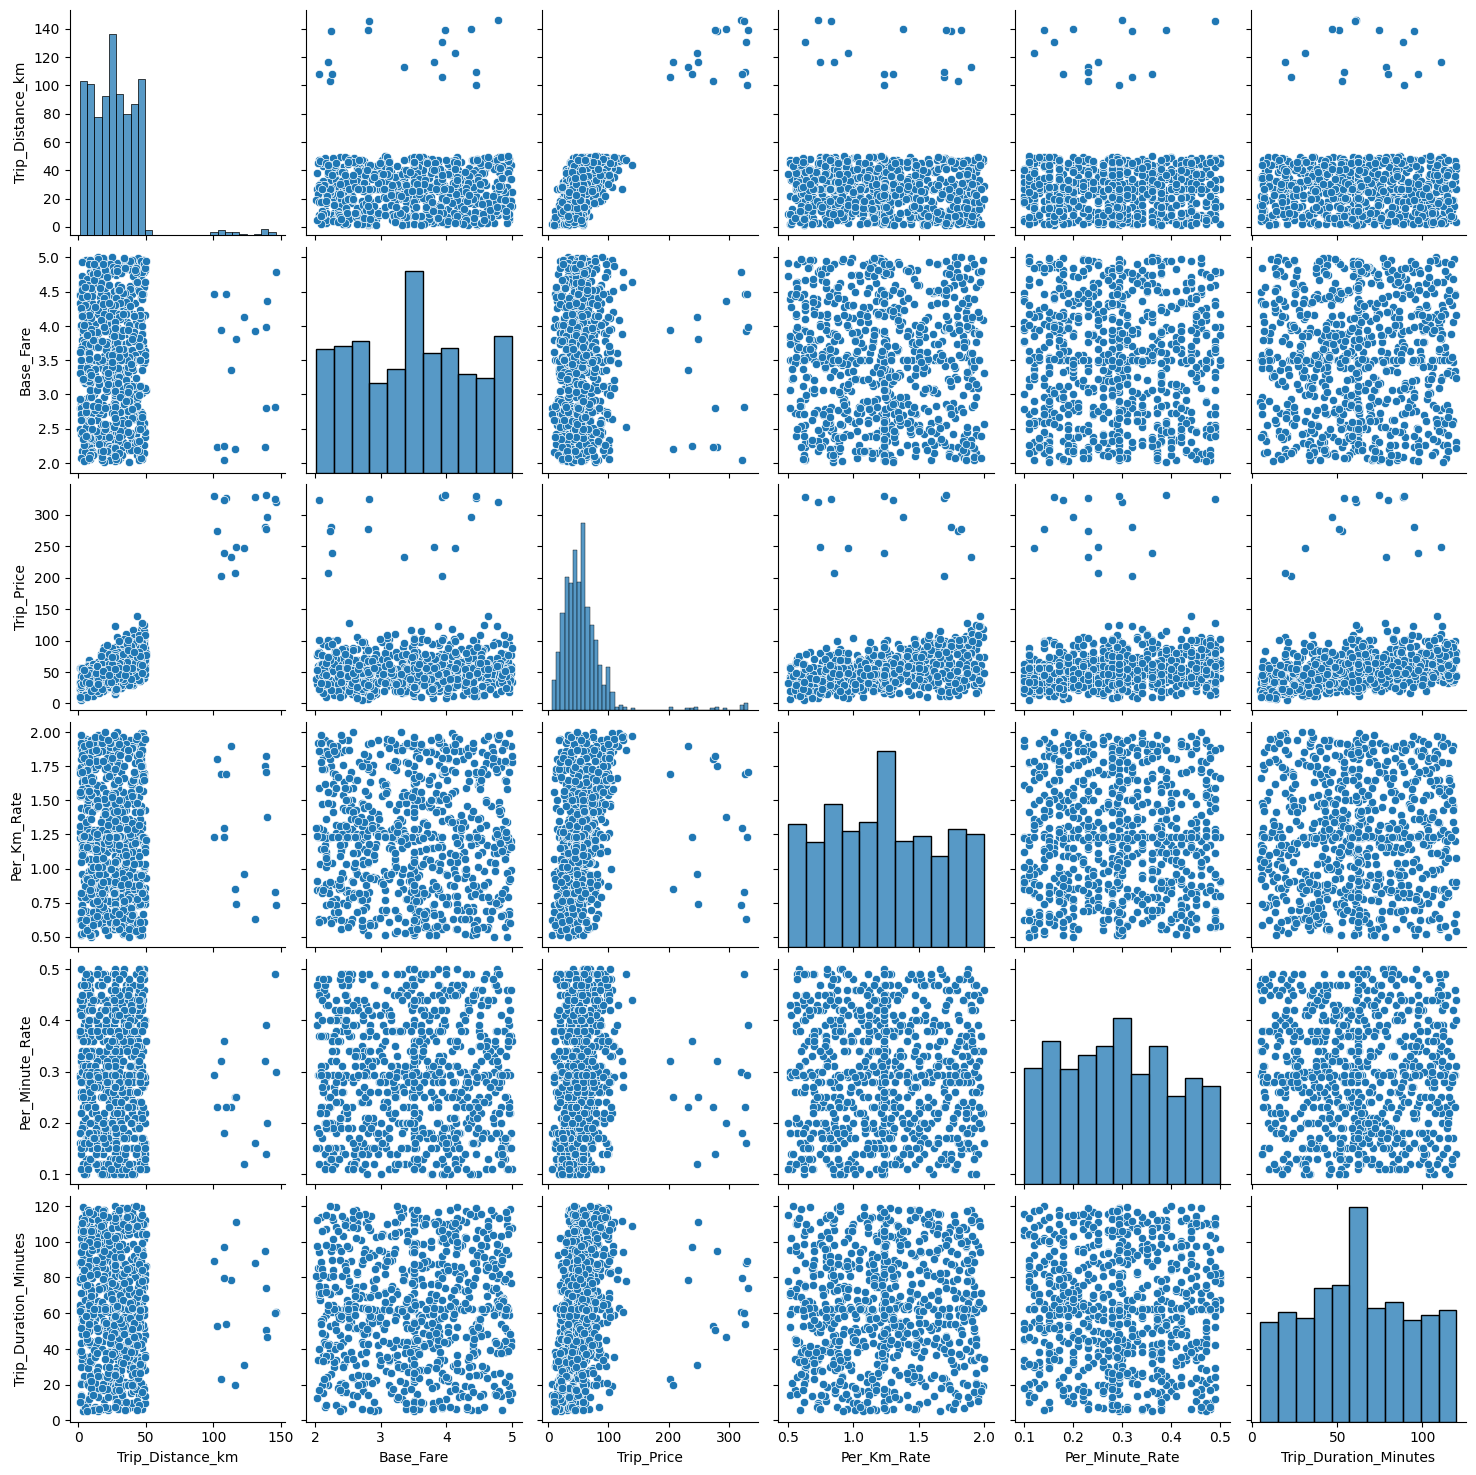

In [29]:
sns.pairplot(df1[['Trip_Distance_km','Base_Fare','Trip_Price','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']])

In [30]:
df1[['Trip_Price','Base_Fare','Trip_Distance_km','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']].corr()

,Trip_Price,Base_Fare,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
Trip_Price,1.000000,0.026285,0.833846,0.248681,0.109352,0.219064
Base_Fare,0.026285,1.000000,0.018987,0.017023,-0.030323,0.034684
Trip_Distance_km,0.833846,0.018987,1.000000,-0.031719,-0.046357,-0.014432
Per_Km_Rate,0.248681,0.017023,-0.031719,1.000000,0.020760,0.043719
Per_Minute_Rate,0.109352,-0.030323,-0.046357,0.020760,1.000000,-0.007651
Trip_Duration_Minutes,0.219064,0.034684,-0.014432,0.043719,-0.007651,1.000000


In [31]:
'''After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation
between Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and
Per_Km_Rate,Trip_Duration_Minutes respectively.'''

'After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation\nbetween Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and\nPer_Km_Rate,Trip_Duration_Minutes respectively.'

<Axes: >

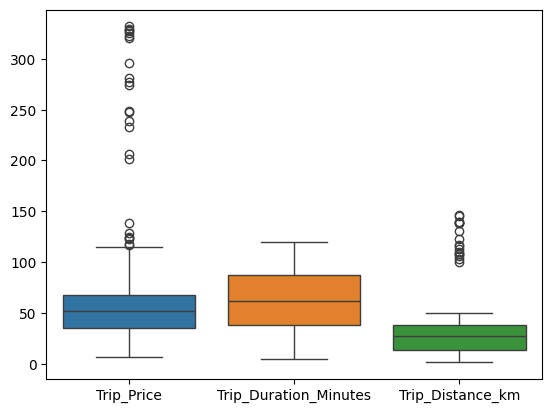

In [32]:
sns.boxplot(data= df1[['Trip_Price','Trip_Duration_Minutes','Trip_Distance_km']])

<Axes: >

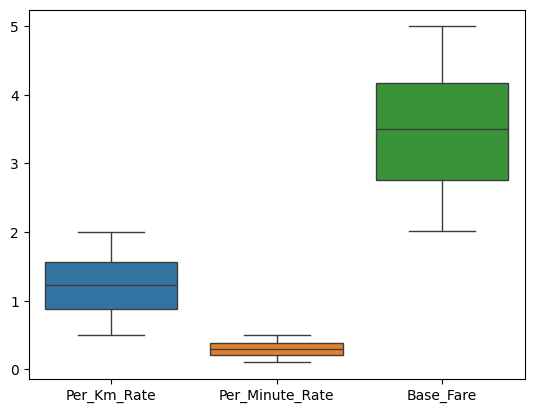

In [33]:
sns.boxplot(data = df1[['Per_Km_Rate','Per_Minute_Rate','Base_Fare']])

In [34]:
def log_transform(x):
    for i in range(df1.shape[0]):
        new_value = np.log(x)
    return new_value

In [35]:
df1['Log_Trip_Price'] = df1['Trip_Price'].apply(log_transform)

In [36]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719


<Axes: >

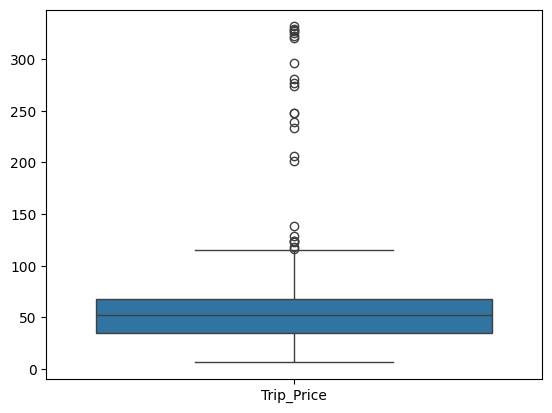

In [37]:
sns.boxplot(df1[['Trip_Price']])

<Axes: xlabel='Trip_Price', ylabel='Count'>

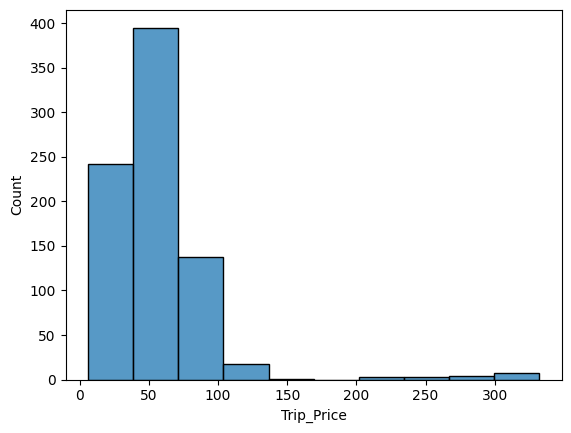

In [38]:
sns.histplot(df1['Trip_Price'],bins=10)

<Axes: >

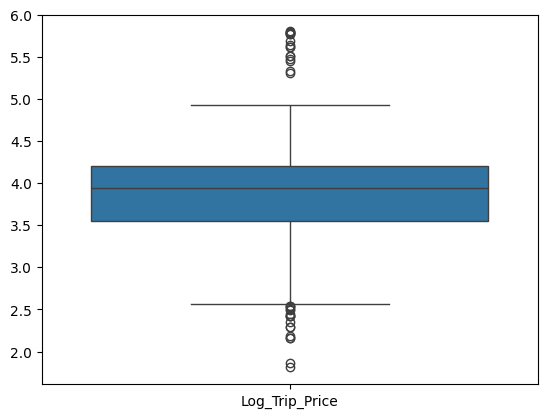

In [39]:
sns.boxplot(df1[['Log_Trip_Price']])

<Axes: xlabel='Log_Trip_Price', ylabel='Count'>

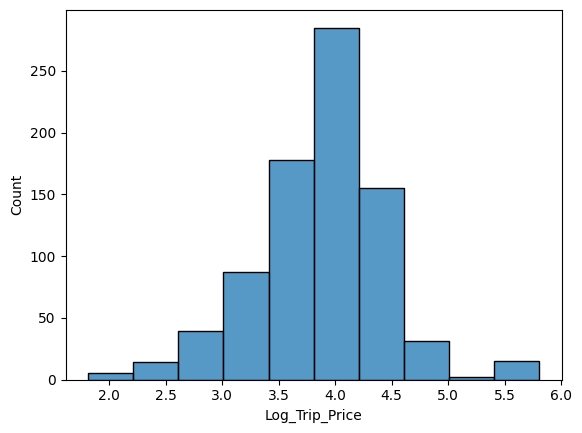

In [40]:
sns.histplot(df1['Log_Trip_Price'],bins=10)

In [41]:
df1['log_Trip_Distance_km'] = df1['Trip_Distance_km'].apply(lambda x: np.log(x))

In [42]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price,log_Trip_Distance_km
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781,2.962692
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852,3.862623
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464,3.607398
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424,3.298446
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719,2.156403


Text(0, 0.5, 'Count')

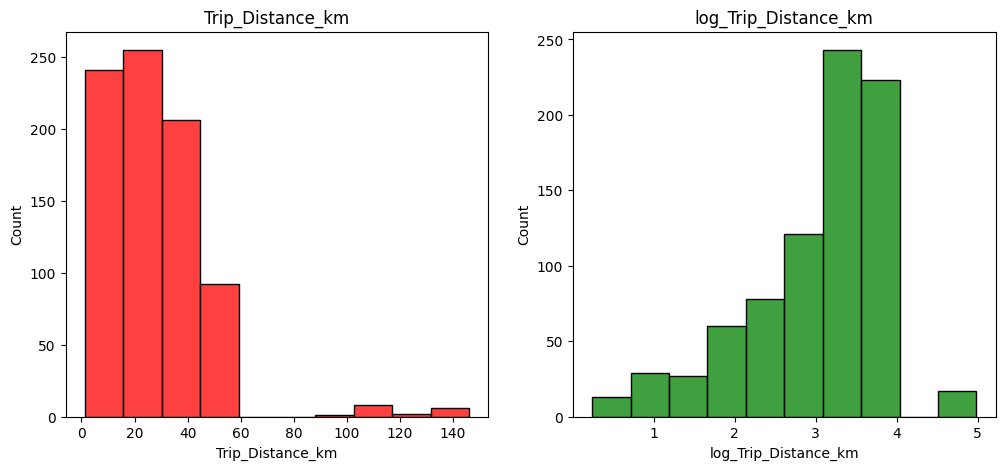

In [43]:
fig,axes = plt.subplots(1,2,figsize = (12,5))

sns.histplot(df1['Trip_Distance_km'], bins = 10, kde = False, color = 'Red', ax = axes[0])
axes[0].set_title('Trip_Distance_km')
axes[0].set_xlabel('Trip_Distance_km')
axes[0].set_ylabel('Count')

sns.histplot(df1['log_Trip_Distance_km'], bins = 10, kde = False, color = 'green', ax = axes[1])
axes[1].set_title('log_Trip_Distance_km')
axes[1].set_xlabel('log_Trip_Distance_km')
axes[1].set_ylabel('Count')



In [44]:
def std_transform(x):
    for i in range(df1.shape[0]):
        norm = (x - df1['Trip_Price'].mean())/df1['Trip_Price'].std()
    return norm

In [45]:
df1['std_Trip_Price'] = df1['Trip_Price'].apply(std_transform)

In [46]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price,log_Trip_Distance_km,std_Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781,2.962692,-0.514004
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852,3.862623,-0.007699
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464,3.607398,-0.105253
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424,3.298446,-1.021096
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719,2.156403,0.074048


<Axes: xlabel='std_Trip_Price', ylabel='Count'>

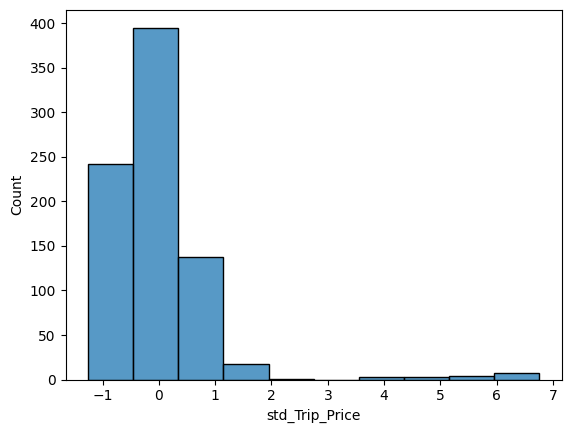

In [47]:
sns.histplot(df1['std_Trip_Price'],bins=10)

## SGDR algorithm

In [48]:
# extracting only the features applicable to linear regressor from df1 and creating new df2
df2 = df1[['Trip_Price','Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]

In [49]:
df2.head(5)

,Trip_Price,Trip_Distance_km,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,36.262400,19.350000,3.560000,0.80,0.32,53.82
1,56.874773,47.590000,3.502989,0.62,0.43,40.57
2,52.903200,36.870000,2.700000,1.21,0.15,37.27
4,15.618000,27.070547,2.930000,0.63,0.32,22.64
5,60.202800,8.640000,2.550000,1.71,0.48,89.33


In [50]:
df2.count()

,0
Trip_Price,811
Trip_Distance_km,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


In [51]:
X = df2[['Trip_Price','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]
y = df2['Trip_Distance_km']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

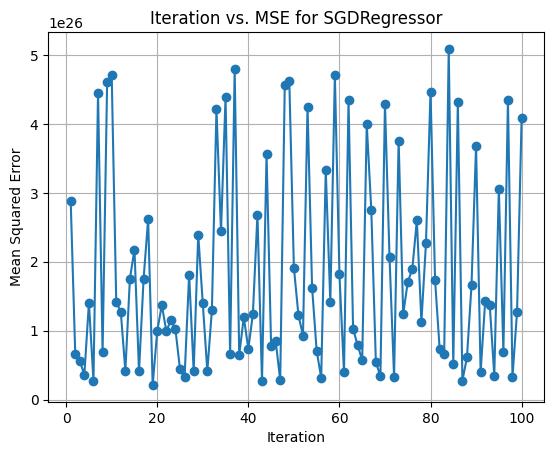

In [53]:
sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)

iteration = 100
mse_value = []
for i in range(iteration):
    sgd_regressor = sgd_regressor.fit(X_train,y_train)
    y_pred = sgd_regressor.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mse_value.append(mse)

plt.plot(range(1, iteration + 1), mse_value, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Iteration vs. MSE for SGDRegressor')
plt.grid()
plt.show()



In [54]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

4.0829046995757526e+26


In [55]:
b_norm = sgd_regressor.intercept_
w_norm = sgd_regressor.coef_
print(b_norm)
print(w_norm)

[-4.33237138e+10]
[-3.12810557e+10 -1.96532206e+11  1.68594775e+11  3.70090225e+10
 -2.46834245e+11]


In [56]:
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'scaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'